Maximum density is too high - decrease
Current density
0.6329234596758319
Maximum density is too high - decrease
Current density
0.64868952044679
Maximum density is too high - decrease
Current density
0.664715251690458
Maximum density is too high - decrease
Current density
0.6810027744025295
Maximum density is too high - decrease
Current density
0.6975542095786967
Maximum density is too high - decrease
Current density
0.7143716782146531
Maximum density is too high - decrease
Current density
0.7314573013060923
Maximum density is too high - decrease
Current density
0.7488131998487063
Maximum density is too high - decrease
Current density
0.7664414948381888
Maximum density is too high - decrease
Current density
0.7843443072702333
Maximum density is too high - decrease
Current density
0.8025237581405319
Maximum density is too high - decrease
Current density
0.8209819684447781
Maximum density is too high - decrease
Current density
0.8397210591786651
Maximum density is too high - decrease
Cu

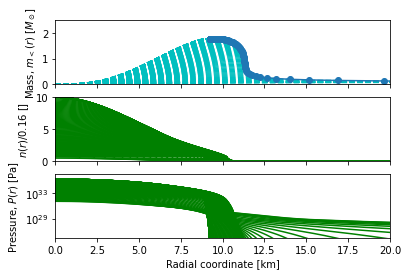

Maximum density is too high - decrease
Current density
0.572413501405237
Maximum density is too high - decrease
Current density
0.587162090242286
Maximum density is too high - decrease
Current density
0.6021618655692728
Maximum density is too high - decrease
Current density
0.6174149483818906
Maximum density is too high - decrease
Current density
0.6329234596758319
Maximum density is too high - decrease
Current density
0.64868952044679
Maximum density is too high - decrease
Current density
0.664715251690458
Maximum density is too high - decrease
Current density
0.6810027744025295
Maximum density is too high - decrease
Current density
0.6975542095786967
Maximum density is too high - decrease
Current density
0.7143716782146531
Maximum density is too high - decrease
Current density
0.7314573013060923
Maximum density is too high - decrease
Current density
0.7488131998487063
Maximum density is too high - decrease
Current density
0.7664414948381888
Maximum density is too high - decrease
Curr

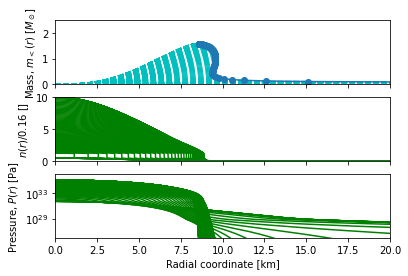

Maximum density is too high - decrease
Current density
0.587162090242286
Maximum density is too high - decrease
Current density
0.6021618655692728
Maximum density is too high - decrease
Current density
0.6174149483818906
Maximum density is too high - decrease
Current density
0.6329234596758319
Maximum density is too high - decrease
Current density
0.64868952044679
Maximum density is too high - decrease
Current density
0.664715251690458
Maximum density is too high - decrease
Current density
0.6810027744025295
Maximum density is too high - decrease
Current density
0.6975542095786967
Maximum density is too high - decrease
Current density
0.7143716782146531
Maximum density is too high - decrease
Current density
0.7314573013060923
Maximum density is too high - decrease
Current density
0.7488131998487063
Maximum density is too high - decrease
Current density
0.7664414948381888
Maximum density is too high - decrease
Current density
0.7843443072702333
Maximum density is too high - decrease
Cur

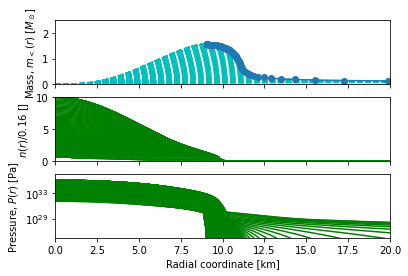

Maximum density is too high - decrease
Current density
0.515888591042555
Maximum density is too high - decrease
Current density
0.5296536438767844
Maximum density is too high - decrease
Current density
0.543661399218179
Maximum density is too high - decrease
Current density
0.557913978062432
Maximum density is too high - decrease
Current density
0.572413501405237
Maximum density is too high - decrease
Current density
0.587162090242286
Maximum density is too high - decrease
Current density
0.6021618655692728
Maximum density is too high - decrease
Current density
0.6174149483818906
Maximum density is too high - decrease
Current density
0.6329234596758319
Maximum density is too high - decrease
Current density
0.64868952044679
Maximum density is too high - decrease
Current density
0.664715251690458
Maximum density is too high - decrease
Current density
0.6810027744025295
Maximum density is too high - decrease
Current density
0.6975542095786967
Maximum density is too high - decrease
Current

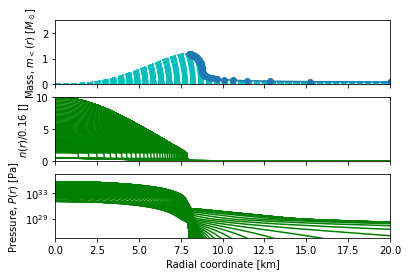

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from physical_constants import *

###############################################################################################################################

coupling=[-0.5,-1]
valorgamma=[0.6]
valordelta=[0.2,0.3]

for valor1,delta in enumerate ( valordelta ):
    
    for valor2,gamma in enumerate (valorgamma ):
        
        for valor3,g_0 in enumerate ( coupling ):
            
            
            
            file_core="delta{}_{}gamma{}.dat".format(delta,g_0,gamma)
            outputfile="delta{}_NS_{}gamma{}.dat".format(delta,g_0,gamma)
            
            
            #############################
            
            
            number_central_density=100

            central_density_i=0.30
            central_density_f=1
            
            
            #############################
            
            
            
            xfc_range=np.linspace(central_density_i,central_density_f,number_central_density)
            
            Y_n=1

            # Massa
            mass_units=np.sqrt(3.*pi)/2./np.power(alphaG,1.5)*mnuc_kg/Msun*np.power(Y_n,2.)
            # Pressió
            press_units=np.power(mnuc_kg*c,4)/np.power(hbar,3)*c/3./np.power(pi,2)
            # Radi
            radial_units=np.sqrt(3.*pi)/2./np.power(alphaG,0.5)*(hbar/mnuc_kg/c)/1e3*Y_n

            rho_units=np.power(mnuc_kg*c/hbar,3)*mnuc_kg/(3.*np.power(pi,2))/Y_n 
            
            
            comptador=np.loadtxt("delta{}_CRUST_{}gamma{}.dat".format(delta,g_0,gamma),usecols=0)
            comptador_list=comptador.tolist()
            
            
            ncrust=len(comptador_list)
            ncore=1000
            nf=ncrust+ncore

            file_crust="delta{}_CRUST_{}gamma{}.dat".format(delta,g_0,gamma)
            eden_crust, pres_crust, den_crust = np.loadtxt(file_crust,usecols=(0,1,2)).T


            eden_core, pres_core, den_core = np.loadtxt(file_core,usecols=(0,1,2)).T
            
            
            eden=np.concatenate((eden_crust,eden_core)) 
            pres=np.concatenate((pres_crust,pres_core)) 
            numden=np.concatenate((den_crust,den_core)) 


            conv1=np.power(mneut,4)/hbc3/3./np.power(pi,2)
            eden=eden/conv1
            pres=pres/conv1
            
            
            ### RK4 ###
            
            step_size=5e-4 

            iradial_max=int(1000./step_size)

            densmax=np.amax(eden)


            NS_mass=np.zeros(number_central_density)
            NS_radius=np.zeros(number_central_density)
            NS_n_central=np.zeros(number_central_density)


            number_coord=np.zeros( number_central_density,dtype=int )

            radial_coord=np.zeros( (number_central_density,iradial_max) )
            mass_profile=np.zeros( (number_central_density,iradial_max) )
            pres_profile=np.zeros( (number_central_density,iradial_max) )
            numden_profile=np.zeros( (number_central_density,iradial_max) )





            for irhoc, xfc in enumerate(xfc_range) : 
    
    
                stepr=step_size
    
                #Condicions inicials
                mass_old=0.
                dens_old=np.power(xfc,3)
                press_old=np.interp(dens_old,eden,pres)
                numden_old=np.interp(dens_old,eden,numden)    
                r_old=stepr
    
    
                if( dens_old >= densmax) : 
                    print('Maximum density is too high - decrease')
                    print('Current density')
                    print(dens_old)
                    exit()
    
    
                for iradial in range(0,iradial_max): 
        
        
                    radial_coord[ irhoc,iradial ]=r_old*radial_units 
                    mass_profile[ irhoc,iradial ]=mass_old*mass_units 
                    pres_profile[ irhoc,iradial ]=press_old*press_units 
                    numden_profile[ irhoc,iradial ]=numden_old
        
        
        
                    k1m=np.power(r_old,2)*dens_old
                    k2m=np.power(r_old+stepr/2.,2)*dens_old
                    k3m=np.power(r_old+stepr/2.,2)*dens_old
                    k4m=np.power(r_old+stepr,2)*dens_old
        
                    dm=stepr/6.*(k1m+2*k2m+2*k3m+k4m)

                    if( mass_old == 0) : 
                        dp=0.
                    else:
                        k1p=-mass_old*dens_old/np.power(r_old,2)
                        k1p=k1p*(1.+press_old/dens_old)
                        k1p=k1p*(1.+press_old*np.power(r_old,3) / mass_old)
                        k1p=k1p/(1.-2.*mass_old/r_old)
            
                        k2p=-mass_old*dens_old/np.power(r_old+stepr/2.,2)
                        k2p=k2p*(1.+(press_old+stepr*k1p/2.)/dens_old)
                        k2p=k2p*(1.+(press_old+stepr*k1p/2.)*np.power(r_old+stepr/2.,3) / mass_old)
                        k2p=k2p/(1.-2.*mass_old/(r_old+stepr/2.))
            
                        k3p=-mass_old*dens_old/np.power(r_old+stepr/2.,2)
                        k3p=k3p*(1.+(press_old+stepr*k2p/2.)/dens_old)
                        k3p=k3p*(1.+(press_old+stepr*k2p/2.)*np.power(r_old+stepr/2.,3) / mass_old)
                        k3p=k3p/(1.-2.*mass_old/(r_old+stepr/2.))
            
                        k4p=-mass_old*dens_old/np.power(r_old+stepr,2)
                        k4p=k4p*(1.+(press_old+stepr*k3p)/dens_old)
                        k4p=k4p*(1.+(press_old+stepr*k3p)*np.power(r_old+stepr,3) / mass_old)
                        k4p=k4p/(1.-2.*mass_old/(r_old+stepr))
            
                        dp=stepr/6.*(k1p+2*k2p+2*k3p+k4p)
            
        
                    press_new=press_old+dp
                    if press_new < 0. : break
                                  
                    mass_new=mass_old+dm
                    r_new=r_old+stepr
        
                    dens_old=np.interp(press_new,pres,eden)
                    numden_old=np.interp(press_new,pres,numden)

                    r_old=r_new
                    mass_old=mass_new
                    press_old=press_new
        
                    if iradial==1:
                        NS_n_central[ irhoc ]=numden_old
            
                    if iradial > 10000:
                        break
    
    
    
    
                else:
                    print("Too many iterations")
                    break
            
    
    
    
                if( iradial < 100 ) :
                    print(("Small number of iterations niter=",iradial))
        
    
    
    
    
                number_coord[ irhoc ] = int(iradial)
                NS_radius[ irhoc ] = r_old*radial_units
                NS_mass[ irhoc ] = mass_old*mass_units
                
                
                ### End RK4 ###
                
                
                
                
            fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
            for iplot in range(0,number_central_density) :
                ax1.plot(radial_coord[iplot,1:number_coord[iplot]], mass_profile[iplot,1:number_coord[iplot]],'c--',)
                ax2.plot(radial_coord[iplot,1:number_coord[iplot]], numden_profile[iplot,1:number_coord[iplot]],'g-',)
                ax3.semilogy(radial_coord[iplot,1:number_coord[iplot]], pres_profile[iplot,1:number_coord[iplot]],'g-',)

            ax1.plot( NS_radius,NS_mass,'o-')

            ax1.set(ylabel='Mass, $m_<(r)$ [$M_\odot$]')
            ax1.set_ylim([0,2.5])
            ax2.set(ylabel='$n(r)/0.16$ []')
            ax2.set_ylim([0,10])
            ax3.set(ylabel='Pressure, $P(r)$ [Pa]')
            ax3.set_ylim([1e26,1e36])

            ax3.set(xlabel='Radial coordinate [km]')
            ax3.set_xlim([0,20])

            plt.show()

            # WRITING OUTPUT IN MR.dat FILE
            data_to_write = np.array( [NS_mass[:],NS_radius[:],NS_n_central[:]] ).T
            

            with open(outputfile,"w+") as file_id :
                np.savetxt(file_id,data_to_write,
                           fmt=["%16.6E","%16.6E","%16.6E"],header="Mass [M_sun]   Radius [km]  CentralDensity/0.16")
                
            